# Amery Lake Drainages Manuscript - Figure 3
January 2022

Data:
* Landsat 8-derived lake volumes: `landsat8_ameryLake_volumes.csv`
    - produced via shoreline elevation extraction DEM and NDWI-classified Landsat 8 data.
* RACMO2.3p2-ERA5 snowmelt volumes: `racmo2.3p2_ameryLake_meltVolume.csv` 
    - extracted at lake grid cell and converted from  to cubic meters water equivalent.
* CATS2008-derived tidal amplitudes: `cats2008_ameryLake_tides.csv` 
    - daily min, max, and tide range extracted using Tide Model Driver  at lake coordinates from 30-minute tide simulation. 


In [1]:
# imports

# for data reading
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import DateFormatter

# set some universal plot settings here
plt.rcParams["figure.dpi"] = 300
sns.set_style("ticks")
sns.set_context("notebook", font_scale=0.65)
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

In [2]:
# read the data

# lake volume data
volume_df = pd.read_csv('landsat8_ameryLake_volumes_elevations.csv', sep =',',index_col='datetime', parse_dates=True)

# racmo data
racmo_df = pd.read_csv('racmo2.3p2_ameryLake_meltVolume.csv', parse_dates=['time'], index_col=['time'])
racmo_df = racmo_df/6 # divide by 6 as to plot on same axis as observed lake volumes

# tidal data
tide_df = pd.read_csv('cats2008_ameryLake_tides.csv', parse_dates=['Time'], index_col=['Time'])

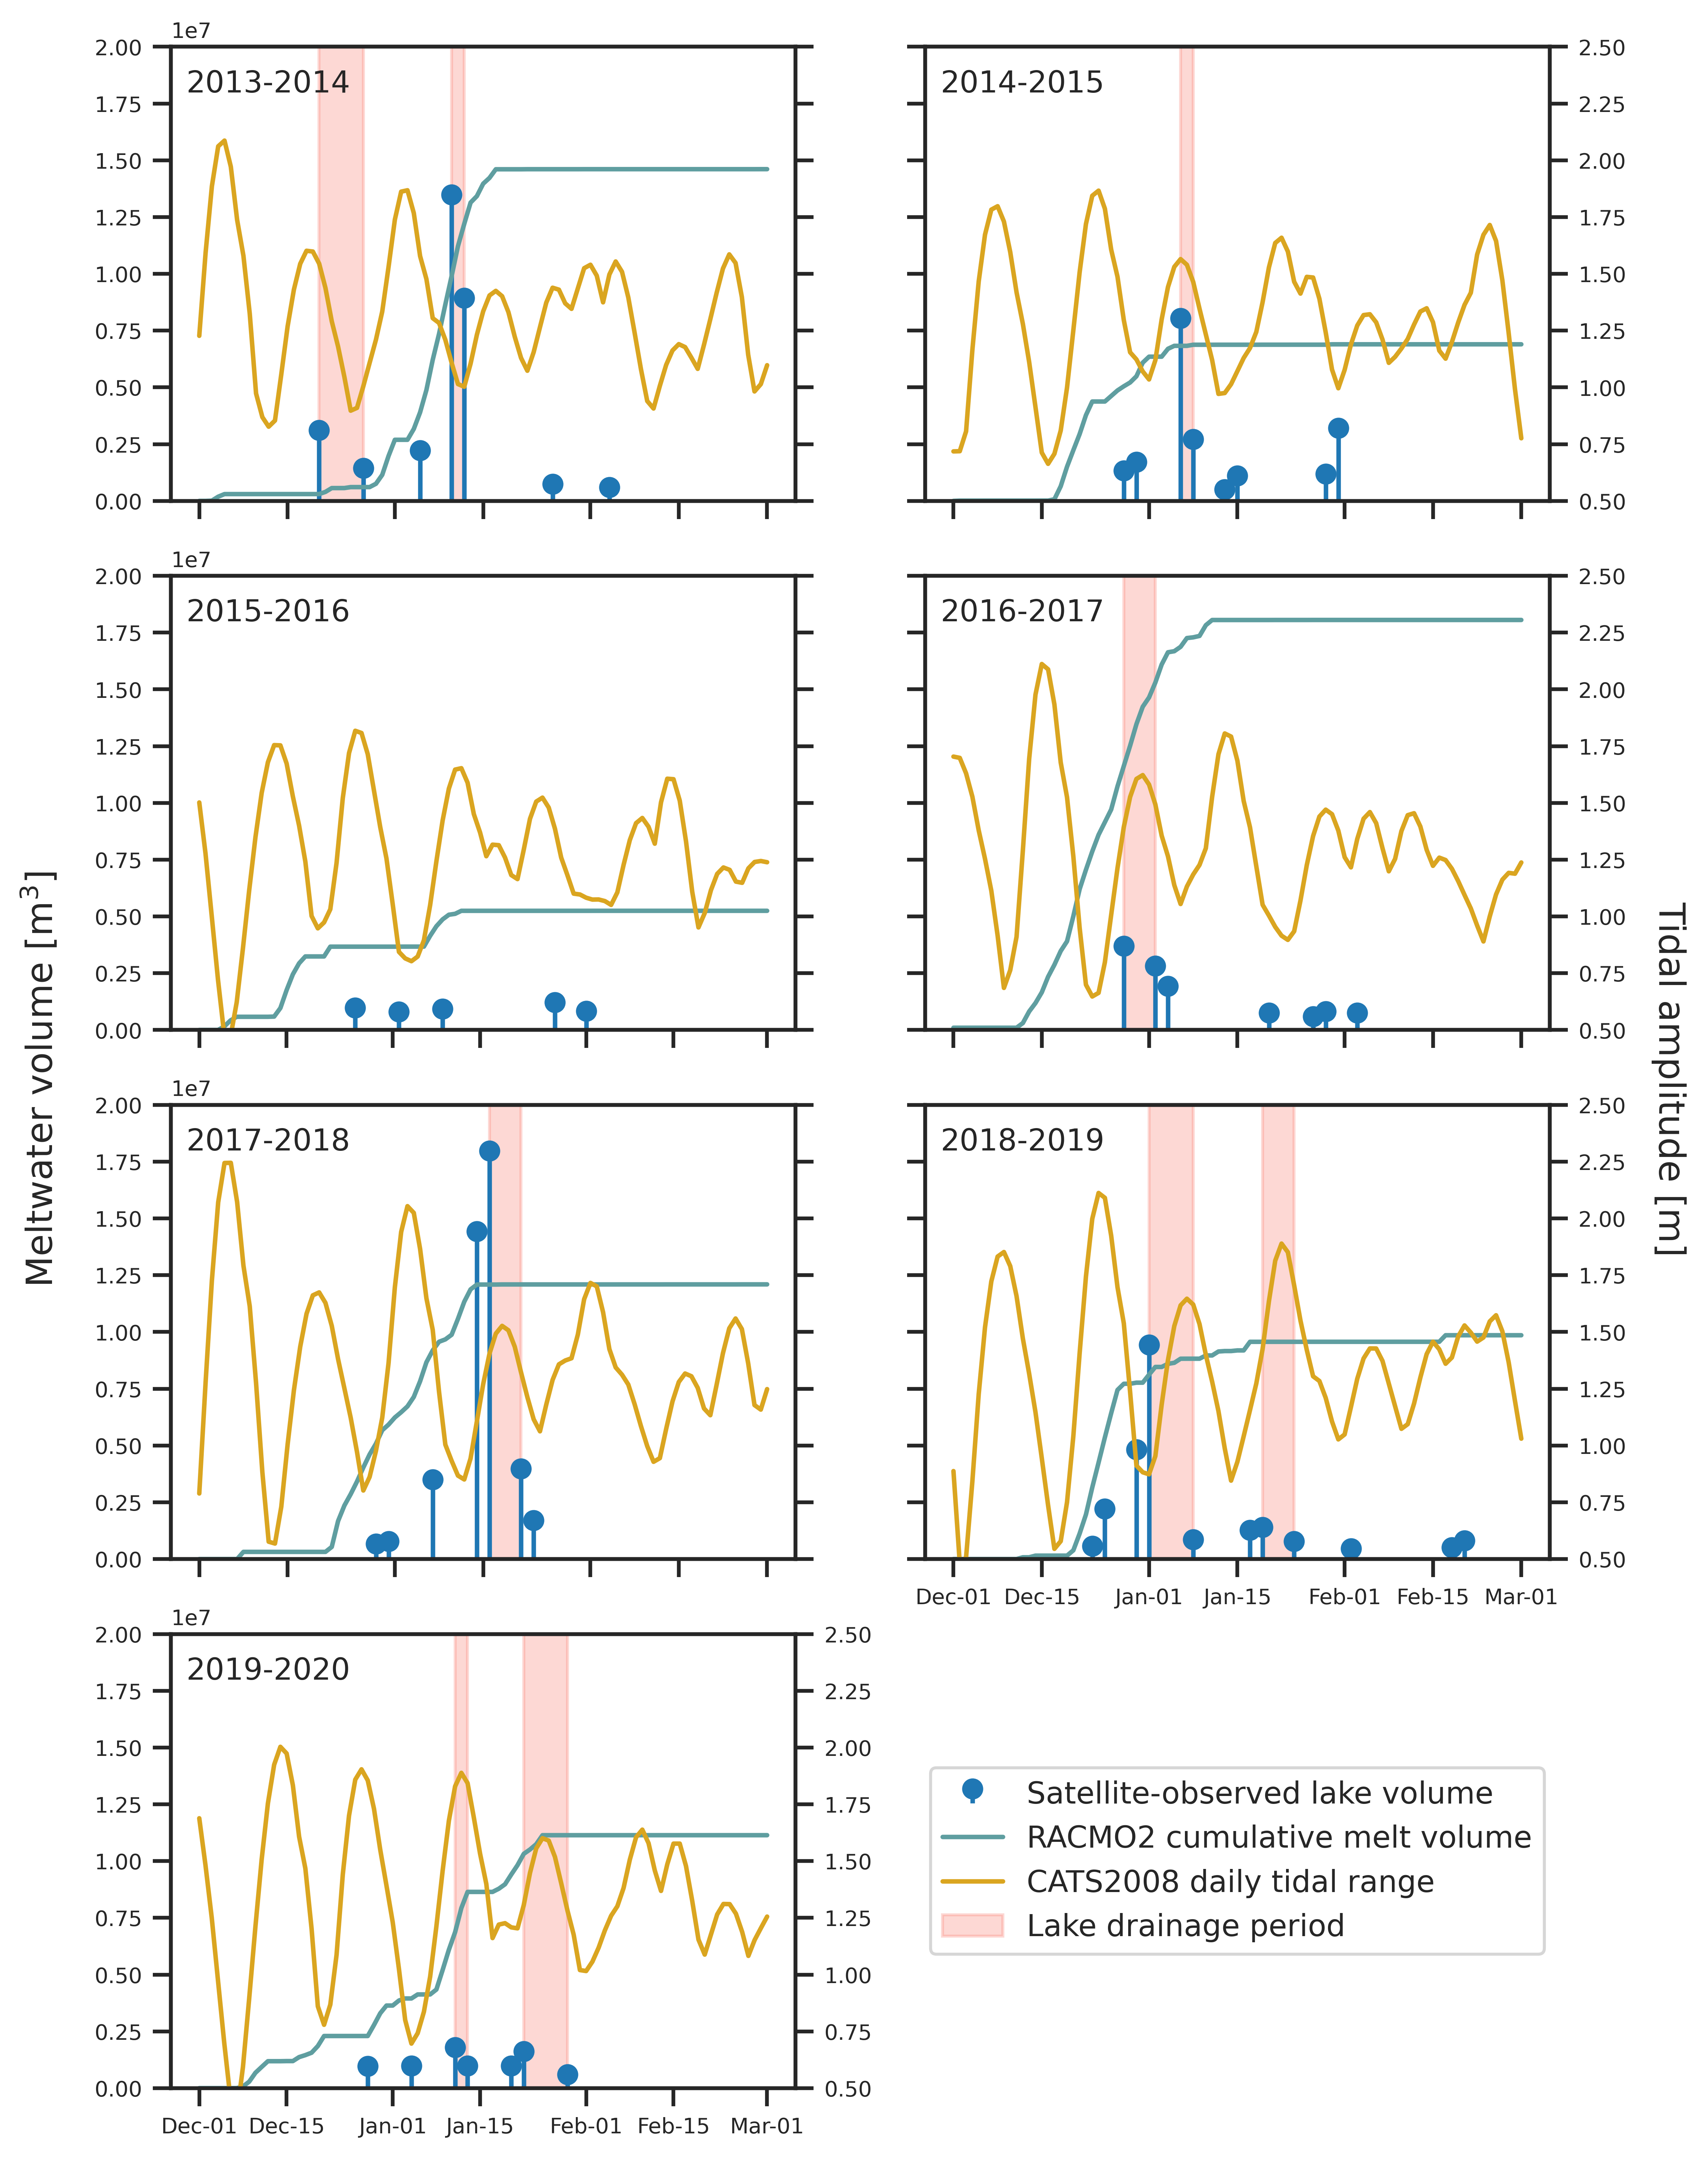

In [3]:
# Make yearly melt plots
years = [2013,2014,2015,2016,2017,2018,2019]

# create a figure
fig = plt.figure(figsize=(7.3,10))

# create subplot axes
ax = [fig.add_subplot(4,2,i+1) for i in range(8)]

# loop through melt season and plot
for i in range(len(ax)):
   
    # set axis
    a = ax[i]
    
    # if it's the last plot, make blank, otherwise plot
    if i==len(ax)-1:
        # turn off 8th plot, and in its place add a legend
        # needed to put comma after ln2 and ln3 when defining to get legend to work
        lines = [ln1, ln2, ln3, ln4]
        labels = [l.get_label() for l in lines]
        a.legend(lines, labels , loc='center', fontsize=10)
        a.axis('off')

    else:
        # get data
        # years
        year1 = years[i]
        year2 = years[i]+1

        # subset the data
        vol_sub = volume_df[str(year1) + '-12-01': str(year2) + '-03-01']
        racmo_sub = racmo_df[str(year1) + '-12-01': str(year2) + '-03-01']
        tide_sub = tide_df[str(year1) + '-12-01': str(year2) + '-03-01']
    
        # plot
        ln1 = a.stem(vol_sub.index, vol_sub['volume [m3]'],
                     label='Satellite-observed lake volume', use_line_collection='True', basefmt=' ')


        ln2, = a.plot(racmo_sub.index, racmo_sub['snowmelt [m3 w.e.]'].cumsum(),
                        label='RACMO2 cumulative melt volume',
                        color='cadetblue')
        
        # add tide data
        a2 = a.twinx()
        
        ln3, = a2.plot(tide_sub.index, tide_sub['z_dayrange'], 
                label='CATS2008 daily tidal range', 
                color='goldenrod')
        
        # add year label
        a.annotate(str(year1)+'-'+str(year2), xy=(0.025, 0.9), xycoords='axes fraction', size=10)
        
        # set axis properties
        date_form = DateFormatter("%b-%d")
        a.xaxis.set_major_formatter(date_form)
        a.set_ylim((0, 2e7))
        a2.set_ylim((0.5, 2.5))
        
        # manually add drain periods
        if i == 0:
            ln4 = a.axvspan('2013-12-20', '2013-12-27', alpha=0.3, color='salmon', label='Lake drainage period')
            a.axvspan('2014-01-10', '2014-01-12', alpha=0.3, color='salmon')
            
        if i == 1:
            a.axvspan('2015-01-06', '2015-01-08', alpha=0.3, color='salmon')
            
        if i == 3:
            a.axvspan('2016-12-28', '2017-01-02', alpha=0.3, color='salmon')            
        
        if i == 4:
            a.axvspan('2018-01-16', '2018-01-21', alpha=0.3, color='salmon')   
            
        if i == 5:
            a.axvspan('2019-01-01', '2019-01-08', alpha=0.3, color='salmon') 
            a.axvspan('2019-01-19', '2019-01-24', alpha=0.3, color='salmon') 
 
        if i == 6:
            a.axvspan('2020-01-11', '2020-01-13', alpha=0.3, color='salmon') 
            a.axvspan('2020-01-22', '2020-01-29', alpha=0.3, color='salmon') 
            
        # manually turn off labels for specific plots
        if i == 0 or i == 2 or i == 4: # y1 labels only
            a.axes.xaxis.set_ticklabels([]) 
            a.tick_params(axis='y')
            a2.axes.yaxis.set_ticklabels([])
        elif i == 5: # only y2 and x labels
            a.tick_params(axis='x')
            a.axes.yaxis.set_ticklabels([])
            a2.tick_params(axis='y')
        elif i == 6: # both y and x labels
            a.tick_params(axis='x')
            a.tick_params(axis='y')
        else: # no labels
            a.axes.xaxis.set_ticklabels([])
            a.axes.yaxis.set_ticklabels([])


# add common x and y labels
fig.text(-0.03, 0.5, 'Meltwater volume [m$^3$]', va='center', rotation='vertical', size=12)
fig.text(1, 0.5, 'Tidal amplitude [m]', va='center', size=12, rotation=-90)


plt.tight_layout()
plt.savefig('Fig3_AmeryLakeDrain.png')
plt.show()